In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [24]:
from sklearn.utils import Bunch

iris = Bunch()
print(type(iris))
iris.frame = pd.read_csv('iris.csv')
print(iris.keys())
iris.frame.sample(5)

<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['frame'])


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
78,6.0,2.9,4.5,1.5,versicolor
88,5.6,3.0,4.1,1.3,versicolor
28,5.2,3.4,1.4,0.2,setosa
106,4.9,2.5,4.5,1.7,virginica
44,5.1,3.8,1.9,0.4,setosa


In [25]:
iris.target = iris.frame['label']
iris.target = iris.target.map({'setosa':0, 'versicolor':1, 'virginica':2})
iris.target.value_counts()

label
0    50
1    50
2    50
Name: count, dtype: int64

In [26]:
iris.data = iris.frame.drop(columns = 'label')
iris.feature_names = iris.data.columns.tolist()
print(iris.feature_names)
iris.data.sample(5)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
40,5.0,3.5,1.3,0.3
29,4.7,3.2,1.6,0.2
48,5.3,3.7,1.5,0.2
124,6.7,3.3,5.7,2.1
102,7.1,3.0,5.9,2.1


In [32]:
import joblib

joblib.dump(iris, 'iris.joblib')

['iris.joblib']

In [36]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
print(iris.keys())
iris.frame.sample(5)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
29,4.7,3.2,1.6,0.2,0
47,4.6,3.2,1.4,0.2,0
61,5.9,3.0,4.2,1.5,1
139,6.9,3.1,5.4,2.1,2
2,4.7,3.2,1.3,0.2,0


In [37]:
표본수 = len(iris.frame)
시험데이터비율 = 0.25
시험데이터수 = round(표본수 * 시험데이터비율)
print(f'{시험데이터수}/{표본수}')

38/150


In [39]:
난수생성기 = np.random.default_rng(1)
무작위순서 = 난수생성기.permutation(표본수)

In [41]:
train_data = iris.data.iloc[무작위순서][:-시험데이터수]
test_data = iris.data.iloc[무작위순서][-시험데이터수:]

train_target = iris.target[무작위순서][:-시험데이터수]
test_target = iris.target[무작위순서][-시험데이터수:]

print(train_data.shape, test_data.shape)
print(train_target.shape, test_target.shape)

(112, 4) (38, 4)
(112,) (38,)


In [42]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(
    iris.data, iris.target, test_size=0.25, shuffle=True, random_state=0, stratify=iris.target
)

print(train_data.shape, test_data.shape)

(112, 4) (38, 4)


In [43]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=1)
model.fit(train_data, train_target)

예측 = model.predict(test_data)
채점 = 예측 == test_target
print(f'{sum(채점)}/{len(채점)}')

37/38


In [44]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame = True)
print(housing.target[:5])
housing.frame.sample(5).round(2)

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
1392,4.36,20.0,6.21,1.06,1679.0,2.75,37.96,-122.10,2.28
7062,5.27,35.0,6.01,1.01,1386.0,3.37,33.93,-118.03,1.80
7710,5.20,37.0,6.19,1.03,600.0,2.54,33.95,-118.14,3.02
10744,10.30,36.0,8.13,1.19,316.0,2.51,33.61,-117.92,5.00
15105,3.31,17.0,4.85,1.03,7302.0,2.30,32.83,-117.01,1.22


In [53]:
iris.data.to_numpy()[:3, [0, 2]]

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3]])

y_pred = [0 1]


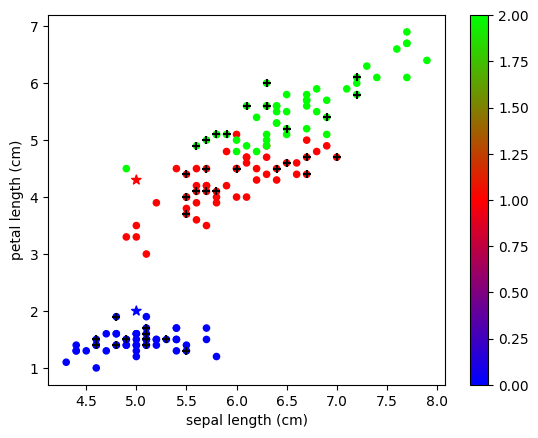

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(
    iris.data.iloc[:, [0, 2]].to_numpy(), iris.target, test_size = 0.25, random_state=0, stratify=iris.target
)
이웃수 = 3

model = KNeighborsClassifier(n_neighbors=이웃수)
model.fit(train_data, train_target)

iris.frame.plot(kind='scatter', x=0, y=2, c=iris.target,cmap='brg')
plt.scatter(test_data[:,0], test_data[:,1], marker='+', c='black')

new_data = np.array([(5.0, 2.0), (5.0, 4.3)])
예측 = model.predict(new_data)
print(f'y_pred = {예측}')
유형별색상맵핑 = np.array(['blue', 'red', 'green'])
plt.scatter(new_data[:,0], new_data[:,1], marker='*', s=50, c=유형별색상맵핑[예측])
plt.show()

In [57]:
거리산출 = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2))

xq = new_data[0]

거리 = []
for xi in train_data:
    거리.append(거리산출(xq, xi))

거리 = pd.Series(거리)
최근접이웃 = 거리.idxmin()
print(f'최근접이웃: {최근접이웃}, xi={train_data[최근접이웃]}')
print(f'xq={xq}', end=' -> ')
print(f'예측: {train_target[최근접이웃]}')
거리.sort_values().head().round(2)

최근접이웃: 41, xi=[5.1 1.9]
xq=[5. 2.] -> 예측: 0


41    0.14
79    0.40
9     0.40
14    0.40
54    0.45
dtype: float64